# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

In this capstone project we will do a webscraping using beautiful soup. The website we will scrap is https://www.exchange-rates.org/exchange-rate-history/usd-idr . The data we want to collect from the website is daily price of 1 dollar in rupiah. We will get the data, convert them to dataframe, then create a simple plot.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [37]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [38]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [39]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To find the right key first we need to visit the website we want to scrap, then inspect the web structure. We need to get several information to be able to scrap the website efficiently. In this case we will try to test table with class history-rates-data. We use prettify to show the html content. From the information we get, we know that information that we want to use is inside <span> and have <class> = "nowrap"

In [40]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:1000])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2025-01-08">
     <span class="nowrap">
      2025-1-8
     </span>
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2025-01-08">
     <span class="nowrap">
      2025-1-8
     </span>
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      16,246 IDR
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      1 USD =
     </span>
     <span class="nowrap">
      16,246 IDR
     </span>
    </span>
   </td>
  </tr>
  <tr class="odd">
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2025-01-07">
     <span class="nowrap">
      2025-1-7
     </span>
    </a>
  


In [41]:
table.find_all('span', attrs={'class': 'nowrap'})[:-50]

[<span class="nowrap">2025-1-8</span>,
 <span class="nowrap">2025-1-8</span>,
 <span class="nowrap">1 USD =</span>,
 <span class="nowrap">16,246 IDR</span>,
 <span class="nowrap">1 USD =</span>,
 <span class="nowrap">16,246 IDR</span>,
 <span class="nowrap">2025-1-7</span>,
 <span class="nowrap">2025-1-7</span>,
 <span class="nowrap">1 USD =</span>,
 <span class="nowrap">16,224 IDR</span>,
 <span class="nowrap">1 USD =</span>,
 <span class="nowrap">16,224 IDR</span>,
 <span class="nowrap">2025-1-6</span>,
 <span class="nowrap">2025-1-6</span>,
 <span class="nowrap">1 USD =</span>,
 <span class="nowrap">16,194 IDR</span>,
 <span class="nowrap">1 USD =</span>,
 <span class="nowrap">16,194 IDR</span>,
 <span class="nowrap">2025-1-3</span>,
 <span class="nowrap">2025-1-3</span>,
 <span class="nowrap">1 USD =</span>,
 <span class="nowrap">16,200 IDR</span>,
 <span class="nowrap">1 USD =</span>,
 <span class="nowrap">16,200 IDR</span>,
 <span class="nowrap">2025-1-2</span>,
 <span class="now

In [42]:
table.find_all("tr")[1].find_all("td")[1].find_all("span")[2].text.strip() 

'16,246 IDR'

In [43]:
table.find_all('span', attrs={'class':'nowrap'})[0]

<span class="nowrap">2025-1-8</span>

In [44]:
table.find_all("tr")[1].find_all("td")[0].find_all("span")[1].text.strip()

'2025-1-8'

Next, we need to find the row length.

In [45]:
row = table.find_all('span', attrs={'class': 'nowrap'})
row_length = len(row)
row_length

774

We do the scraping process using for loop. First we initiate a tuple using temp = [] and then we set the paramater for the loop.
Based on our experiments above, when we scrap the website all of the information we want to get are mixed into 1 long list. The <span> don't have attributes or class name which differentiate date and exchange rate.  
Because of that we will separate the data based on the pattern we found.
For the date we will use i, for the exchange rate we will use the i+4. We will use 6 as increment because each TR have 6 spans. We use strips to remove white spaces. and use replace function to remove IDR from the exchange rate.

In [46]:
temp = []  # Initiating a tuple

for i in range(1, row_length, 6):

    # Scraping process
    # Date
    date = table.find_all('span', attrs={'class': 'nowrap'})[i].text
    date = date.strip()
    # Exchange Rate
    exchange = table.find_all('span', attrs={'class': 'nowrap'})[i+4].text
    exchange = exchange.strip().replace(' IDR', '')

    temp.append((date, exchange))
temp

[('2025-1-8', '16,246'),
 ('2025-1-7', '16,224'),
 ('2025-1-6', '16,194'),
 ('2025-1-3', '16,200'),
 ('2025-1-2', '16,237'),
 ('2025-1-1', '16,248'),
 ('2024-12-31', '16,267'),
 ('2024-12-30', '16,143'),
 ('2024-12-27', '16,185'),
 ('2024-12-26', '16,195'),
 ('2024-12-25', '16,181'),
 ('2024-12-24', '16,213'),
 ('2024-12-23', '16,231'),
 ('2024-12-20', '16,171'),
 ('2024-12-19', '16,338'),
 ('2024-12-18', '16,196'),
 ('2024-12-17', '16,051'),
 ('2024-12-16', '16,016'),
 ('2024-12-13', '16,032'),
 ('2024-12-12', '15,974'),
 ('2024-12-11', '15,971'),
 ('2024-12-10', '15,914'),
 ('2024-12-9', '15,865'),
 ('2024-12-6', '15,865'),
 ('2024-12-5', '15,866'),
 ('2024-12-4', '15,917'),
 ('2024-12-3', '15,980'),
 ('2024-12-2', '15,935'),
 ('2024-11-29', '15,836'),
 ('2024-11-28', '15,885'),
 ('2024-11-27', '15,873'),
 ('2024-11-26', '15,943'),
 ('2024-11-25', '15,879'),
 ('2024-11-22', '15,944'),
 ('2024-11-21', '15,898'),
 ('2024-11-20', '15,938'),
 ('2024-11-19', '15,854'),
 ('2024-11-18', '15

We reverse the information so the data start from the oldest to newest using [::-1]

In [47]:
temp_ok = temp[::-1]
temp_ok

[('2024-7-12', '16,115'),
 ('2024-7-15', '16,192'),
 ('2024-7-16', '16,166'),
 ('2024-7-17', '16,151'),
 ('2024-7-18', '16,181'),
 ('2024-7-19', '16,213'),
 ('2024-7-22', '16,218'),
 ('2024-7-23', '16,219'),
 ('2024-7-24', '16,245'),
 ('2024-7-25', '16,332'),
 ('2024-7-26', '16,304'),
 ('2024-7-29', '16,297'),
 ('2024-7-30', '16,326'),
 ('2024-7-31', '16,251'),
 ('2024-8-1', '16,275'),
 ('2024-8-2', '16,176'),
 ('2024-8-5', '16,222'),
 ('2024-8-6', '16,175'),
 ('2024-8-7', '16,030'),
 ('2024-8-8', '15,985'),
 ('2024-8-9', '15,950'),
 ('2024-8-12', '15,948'),
 ('2024-8-13', '15,756'),
 ('2024-8-14', '15,634'),
 ('2024-8-15', '15,773'),
 ('2024-8-16', '15,698'),
 ('2024-8-19', '15,530'),
 ('2024-8-20', '15,449'),
 ('2024-8-21', '15,508'),
 ('2024-8-22', '15,751'),
 ('2024-8-23', '15,401'),
 ('2024-8-26', '15,483'),
 ('2024-8-27', '15,481'),
 ('2024-8-28', '15,446'),
 ('2024-8-29', '15,466'),
 ('2024-8-30', '15,532'),
 ('2024-9-2', '15,554'),
 ('2024-9-3', '15,557'),
 ('2024-9-4', '15,458

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [48]:
import pandas as pd

df = pd.DataFrame(temp_ok, columns=['Date', 'Exchange Rate'])
df.head()

,Date,Exchange Rate
0,2024-7-12,"16,115"
1,2024-7-15,"16,192"
2,2024-7-16,"16,166"
3,2024-7-17,"16,151"
4,2024-7-18,"16,181"


### Data Cleansing

First we check our dataframe using .dtypes to see which column need adjustment. Date and Exchange Rate both need adjustment. We will change date to datetime and exchange rate to float, for exchange rate we also need to remove the "," (comma).

In [49]:
df.dtypes


Date             object
Exchange Rate    object
dtype: object

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df['Exchange Rate'] = df['Exchange Rate'].str.replace(',', '')
df['Exchange Rate'] = df['Exchange Rate'].astype(float)
df.dtypes

Date             datetime64[ns]
Exchange Rate           float64
dtype: object

In [51]:
df

,Date,Exchange Rate
0,2024-07-12,16115.0
1,2024-07-15,16192.0
2,2024-07-16,16166.0
3,2024-07-17,16151.0
4,2024-07-18,16181.0
...,...,...
124,2025-01-02,16237.0
125,2025-01-03,16200.0
126,2025-01-06,16194.0
127,2025-01-07,16224.0


### Data Visualization

We will create a line plot. First we need to set the index. We use set_index and use Date as the index. Then we visualize the data using .plot()

In [59]:
df_line = df.set_index('Date')

<Axes: xlabel='Date'>

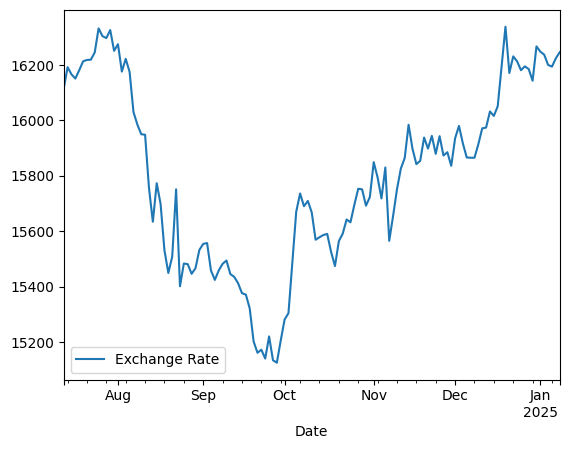

In [60]:

df_line.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

<Axes: xlabel='Date'>

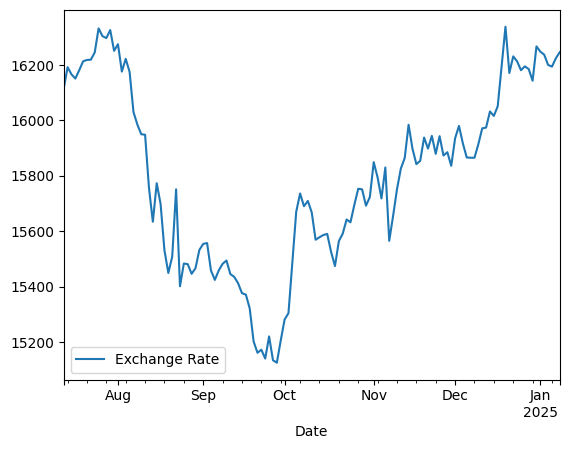

In [61]:
df_line.plot()

## Analysis

Based on data from July 2024 until today (9 January 2025)
The exchange rate trends in the plot suggest a turbulent market with significant fluctuations. Rupiah have positive outlook at end of September but getting weaker in the coming months until today.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

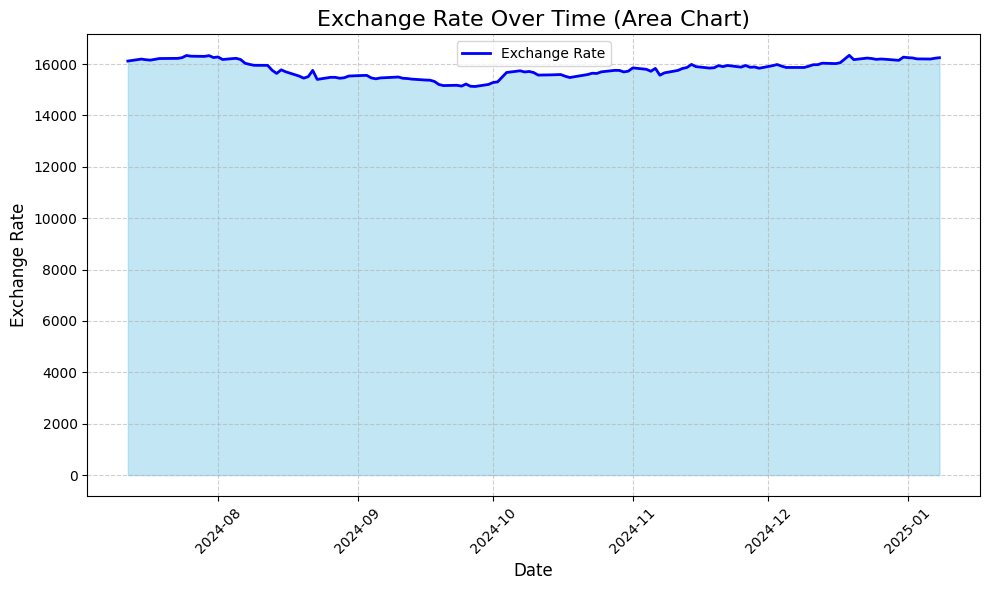

In [ ]:
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10, 6))
plt.fill_between(df['Date'], df['Exchange Rate'], color='skyblue', alpha=0.5)
plt.plot(df['Date'], df['Exchange Rate'], color='blue', linewidth=2, label='Exchange Rate')

# plot formatting
plt.title('Exchange Rate Over Time (Area Chart)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Exchange Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()